# 100 Statistical Testing

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
%matplotlib inline
%config InlineBackend.figure_format='svg'
plt.rcParams.update({"text.usetex": True})
import seaborn as sns
sns.set_theme(style="whitegrid")
import ipywidgets as widgets 

np.random.seed(2024)

# Test List

## Test 1

**Objective**
To test the difference of means between **an assumed population** ($\mu_0$) and **a sample** ($\bar{x}$)

**Limitation**
1. Known population variance $\sigma^2$ (Otherwise, Test 7)
2. The population should be normally distributed

**Method**
For a random sample of size $n$, the test statitic is
$$
Z = \frac{\bar{x} - \mu_0}{\frac{\sigma}{\sqrt{n}}}
$$
It is compared with the standard normal distribution using either an one- or two-tailed test, with critical region of size $\alpha$ 

In [2]:
def test_1(sample, population):
    bar_x = sample.mean
    mu_0 = population.mean
    sigma = population.std
    n = sample.size
    return (bar_x - mu_0) / (sigma / np.sqrt(n))

## Test 2. z-test for 2 population means (variances known and equal)

**Objective**
To test the difference between the means of 2 populations

**Limitation**
1. Known population variance $\sigma^2$, same for both populations (Otherwise, test 8)
2. The populations shoulbe be normally distributed

**Method**

**Test Statistic**
For two populations with means $\mu_1$ and $\mu_2$, and random samples of size $n_1$ and $n_2$ give sample means $\bar{x_1}$ and $\bar{x_2}$, 

$$
Z = \frac{(\bar{x_1} - \bar{x_2}) - (\mu_1 - \mu_2)}{\sigma \sqrt{\frac{1}{n_1} + \frac{1}{n_2}}}
$$

is compared with teh standard normal distribution using either a one- or two-tailed test, with critical region of size $\alpha$

In [3]:
def test_2(two_samples, two_populations): 
    samples1, samples2 = two_samples
    population1, population2 = two_populations
    bar_x1, bar_x2 = samples1.mean, samples2.mean
    n1, n2 = samples1.size, samples2.size
    mu1, mu2 = population1.mean, population2.mean
    sigma = population1.std
    return ((bar_x1 - bar_x2) - (mu1 - mu2)) / (sigma * np.sqrt(1. / n1 + 1. / n2))

## Test 3. z-test for 2 population means (variances known and unequal)

**Objective**
To test the difference between the means of 2 populations

**Limitation**
1. Known population variances but different (Otherwise, test 9)
2. The populations shoulbe be normally distributed

**Method**

**Test Statistic**
For two populations with means $\mu_1$ and $\mu_2$ and variances $\sigma_1^2$ and $\sigma_2^2$, and random samples of size $n_1$ and $n_2$ give sample means $\bar{x_1}$ and $\bar{x_2}$, 
$$
Z = \frac{(\bar{x_1} - \bar{x_2}) - (\mu_1 - \mu_2)}{\sqrt{\frac{\sigma_1^2}{n_1} + \frac{\sigma_2^2}{n_2}}}
$$
is compared with teh standard normal distribution using either a one- or two-tailed test, with critical region of size $\alpha$

In [4]:
def test_3(two_samples, two_populations): 
    samples1, samples2 = two_samples
    population1, population2 = two_populations
    bar_x1, bar_x2 = samples1.mean, samples2.mean
    n1, n2 = samples1.size, samples2.size
    mu1, mu2 = population1.mean, population2.mean
    sigma1_2, sigma2_2 = population1.var, population2.var
    return ((bar_x1 - bar_x2) - (mu1 - mu2)) / np.sqrt(sigma1_2 / n1 + sigma2_2 / n2)

## Test 4. z-test for a proportion (Binomial Distribution)

**Objective**
To test the difference between an assumed proportion $p_0$ and an observed proportion $p$

**Limitation**
1. assume that the number of observations is sufficiently large (i.e. $n \ge 30$) to justify the normal approximation to the binomial

**Method**

**Test Statistic**
A random sample of $n$ elements is taken from a population which is assumed to be $p_0$. The proportion $p$ is calculated from sample, 
$$
Z = \frac{|p - p_0| - \frac{1}{2n}}{\sqrt{\frac{p_0 (1 - p_0)}{n}}}
$$
is compared with teh standard normal distribution using either a one- or two-tailed test, with critical region of size $\alpha$

In [5]:
def test_4(sample, population): 
    p, p0 = sample.mean, population.mean
    n = sample.size
    return  (np.abs(p - p0) - 1 / (2 * n)) / np.sqrt(p0 * (1 - p0) / n)

## Test 5. z-test for the equality of two proportions (Binomial Distribution)

**Objective**
To test the difference between 2 proportions $\pi_1$ and $\pi_2$ based on 2 samples

**Limitation**
1. assume that the number of observations is sufficiently large (i.e. $n_1, n_2 \ge 30$) to justify the normal approximation to the binomial

**Method**

**Test Statistic**
Random samples of $n_1$ and $n_2$ elements is taken from 2 proportions $\pi_1$ and $\pi_2$. The proportion $p_1$ and $p_2$ is calculated from sample, 
$$
Z = \frac{|p_1 - p_2|}{\sqrt{P (1 - P)(\frac{1}{n_1} + \frac{1}{n_2})}}
$$
where
$$
P = \frac{p_1 n_1 + p_2 n_2}{n_1 + n_2}
$$
is compared with teh standard normal distribution using either a one- or two-tailed test, with critical region of size $\alpha$

In [6]:
def test_5(two_samples, dummy):
    samples1, samples2 = two_samples
    p1, p2 = samples1.mean, samples2.mean
    n1, n2 = samples1.size, samples2.size
    P = (p1 * n1 + p2 * n2) / (n1 + n2)
    return (p1 - p2) / np.sqrt(P * (1 - P) * (1 / n1 + 1 / n2))

## Test 6. z-test for comparing two counts (Poisson Distribution)

**Objective**
To test the difference between 2 counts

**Limitation**
1. assume that the counts are large enough to justify the normal approximation to the Poisson

**Method**

**Test Statistic**
For $n_1$ and $n_2$ 2 counts taken over times $t_1$ and $t_2$. The average frequencies are $R_1 = \frac{n_1}{t_1}$ and $R_2 = \frac{n_2}{t_2}$,

$$
Z = \frac{R_1 - R_2}{\sqrt{\frac{R_1}{t_1} + \frac{R_2}{t_2}}}
$$
is compared with teh standard normal distribution using either a one- or two-tailed test, with critical region of size $\alpha$

In [7]:
def test_6(two_samples, dummy):
    (samples1, samples2), (t1, t2) = two_samples
    R1, R2 = samples1.mean, samples2.mean
    return (R1 - R2) / np.sqrt(R1 / t1 + R2 / t2)

## Test 7. t-test for a population mean (variance unknown)

**Objective**
To test the difference between an assumed population mean $\mu_0$ and a sample mean $\bar{x}$

**Limitation**
1. Unknown population variance $\sigma^2$ (Otherwise, test 1)
2. The population shoulbe be normally distributed

**Method**

For a random sample of size $n$, the sample std is
$$
s = \sqrt{\frac{\sum_{i=1}^n (x_i - \bar{x})}{n - 1}}
$$

and 
**Test Statistic**
$$
t = \frac{\bar{x} - \mu_0}{\frac{s}{\sqrt n}}
$$
is compared with the Student's t-distribution with $(n-1)$ degrees of freedom using either a one- or two-tailed test, with critical region of size $\alpha$

In [8]:
def test_7(sample, population):
    bar_x = sample.mean
    diff = sample.sample_data - bar_x
    n = sample.size
    s = np.sqrt(diff @ diff/ (n - 1))
    mu0 = population.mean
    return (bar_x - mu0) / (s / np.sqrt(n))

## Test 8. t-test for 2 population means (variances unknown but equal)

**Objective**
To test the difference between 2 population means

**Limitation**
1. Unknown population variances (Otherwise, test 2)
2. The populations shoulbe be normally distributed

**Method**

Consider 2 populations with means $\mu_1$ and $\mu_2$, sampling with sample sizes $n_1$ and $n_2$, and sampled means are $\bar{x_1}$ and $\bar{x_2}$, then we have

$$
s_1^2 = \sum_{i=1}^{n_1} (x_i - \bar{x}_1)^2
$$

and 

$$
s_2^2 = \sum_{i=1}^{n_2} (x_i - \bar{x}_2)^2
$$

The best estimate of the population variance is 
$$
s^2 = \frac{(n_1 - 1)s_1^2 + (n_2 - 1)s_2^2}{n_1 + n_2 -2}
$$

**Test Statistic**
$$
t = \frac{(\bar{x}_1 - \bar{x}_2) - (\mu_1 - \mu_2)}{s\sqrt{\frac{1}{n_1} + \frac{1}{n_2}}}
$$
is compared with the Student's t-distribution with $(n_1 + n_2 - 1)$ degrees of freedom using either a one- or two-tailed test, with critical region of size $\alpha$

In [9]:
def test_8(two_samples, two_populations):
    sample1, sample2 = two_samples
    population1, population2 = two_populations
    n1, n2 = sample1.size, sample2.size
    bar_x1, bar_x2 = sample1.mean, sample2.mean
    mu1, mu2 = population1.mean, population2.mean
    diff_1 = sample1.sample_data - bar_x1
    diff_2 = sample2.sample_data - bar_x2
    s1_2, s2_2 = diff_1 @ diff_1, diff_2 @ diff_2
    s_2 = ((n1 - 1) * s1_2 + (n2 - 1) * s2_2) / (n1 + n2 - 2) 
    return ((bar_x1 - bar_x2) - (mu1 - mu2)) / np.sqrt(s_2 * (1. / n1 + 1. / n2))

## Test 9. t-test for 2 population means (variances unknown and unequal)

**Objective**
To test the difference between 2 population means

**Limitation**
1. Unknown population variances (Otherwise, test 3)
2. The populations shoulbe be normally distributed
3. The test should only be used to test the hypothesis $\mu_1 = \mu_2$ 

**Method**

Consider 2 populations with means $\mu_1$ and $\mu_2$, sampling with sample sizes $n_1$ and $n_2$, and sampled means are $\bar{x}_1$ and $\bar{x}_2$, then we have

$$
s_1^2 = \sum_{i=1}^{n_1} \frac{(x_i - \bar{x}_1)}{n_1 - 1}
$$

and 

$$
s_2^2 = \sum_{i=1}^{n_2} \frac{(x_i - \bar{x}_2)}{n_2 - 1}
$$

**Test Statistic**
$$
t = \frac{(\bar{x}_1 - \bar{x}_1) - (\mu_1 - \mu_2)}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}
$$
is compared with the Student's t-distribution with degrees of freedom given by
$$
\nu = \frac{\left(\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}\right)^2}{\frac{s_1^4}{n_1^2(n_1 - 1)} + \frac{s_2^4}{n_2^2(n_2 - 1)}}
$$
using either a one- or two-tailed test, with critical region of size $\alpha$

In [10]:
def test_9(two_samples, two_populations):
    sample1, sample2 = two_samples
    population1, population2 = two_populations
    bar_x1, bar_x2 = sample1.mean, sample2.mean
    n1, n2 = sample1.size, sample2.size
    diff_1 = sample1.sample_data - sample1.mean
    diff_2 = sample2.sample_data - sample2.mean
    s1_2, s2_2 = diff_1 @ diff_1 / (n1 - 1), diff_2 @ diff_2 / (n2 - 1)
    mu1, mu2 = population1.mean, population2.mean
    return ((bar_x1 - bar_x2) - (mu1 - mu2)) / np.sqrt(s1_2 / n1 + s2_2 / n2)

## Test 10. t-test for 2 population means (method of paired comparisons)

**Objective**
To test the difference between 2 population means. No assumption about the population variances

**Limitation**
1. Two samples must have same size
2. The populations should be normally distributed

**Method**

Let $d_i$ denote the difference between each pair of observations. Consider $n$ such pairs, variance is

$$
s^2 = \sum_{i=1}^{n} \frac{(d_i - \bar{d}_1)}{n - 1}
$$

**Test Statistic**
$$
t = \frac{(\bar{x}_1 - \bar{x}_2)}{\frac{s}{\sqrt{n}}}
$$
is compared with the Student's t-distribution with $(n - 1)$ degrees of freedom using either a one- or two-tailed test, with critical region of size $\alpha$

In [11]:
def test_10(two_samples, dummy):
    sample1, sample2 = two_samples
    bar_x1, bar_x2 = sample1.mean, sample2.mean
    n = sample1.size
    diff = sample1.sample_data - sample2.sample_data
    bar_d1 = diff.mean()
    d_diff = diff - bar_d1
    s_2 = d_diff @ d_diff / (n - 1)
    return (bar_x1 - bar_x2) / np.sqrt(s_2 / n)

## Test 11. t-test for a regression coefficient

**Objective**
To investigate the significance of the regression coefficient of $y$ on $x$

**Limitation**
1. the variable $y$ follows a normal distribution for each value of $x$
2. the variance among the $y$ values remains constant for any given value of $x$

**Method**

In order to estimate a linear regression of the form $y = A + B(x - \bar{x})$, a sample of $n$ pairs of points $(x_i, y_i)$ is required. $B$ is called the regression coefficient, and to test **the null hypothesis that this is equal to 0**, we first calculate  

$$
b = \frac{\sum x_i y_i - \frac{1}{n} \sum x_i \sum y_i}{\sum x_i^2 - \frac{1}{n}\left(\sum x_i\right)^2}
$$

The variance of $x$ and $y$ are calculated as 
$$
s_x^2 = \frac{\sum (x_i - \bar{x})^2}{n - 1}
$$
$$
s_{yx}^2 = \frac{\sum (y_i - \bar{y} - b (x_i - \bar{x}))^2}{n - 2}
$$
**Test Statistic**
$$
t = \frac{b s_x}{s_{yx} \sqrt{n - 1}}
$$
is compared with the Student's t-distribution with $(n - 2)$ degrees of freedom. Must use **two-tailed test** since $b$ can be positive or negative, with critical region of size $\alpha$.

The test can be one-tailed if the alternative hypothesis is directional. 

In [12]:
def test_11(two_samples, dummy):
    x, y = two_samples
    x_data, y_data = x.sample_data, y.sample_data
    n = x.size
    sum_xy = x_data @ y_data
    sum_x_2 = x_data @ x_data
    x2 = x_data ** 2
    sum_x = np.sqrt(sum_x_2)
    sum_y = np.sqrt(y_data @ y_data)
    sum_x2 = np.sqrt(x2 @ x2)
    b = (sum_xy - sum_x * sum_y / n) / (sum_x2 - sum_x_2 / n)
    bar_x, bar_y = x.mean, y.mean
    diff_x = x_data - bar_x
    sx_2 = diff_x @ diff_x / (n - 1)
    diff_y_bx = y_data - bar_y - b * diff_x
    syx_2 = diff_y_bx @ diff_y_bx / (n - 1)
    t = b * np.sqrt(sx_2 / syx_2 / (n - 1))
    return t

## Test 12. t-test for a correlation coefficient

**Objective**
To investigate the diffference between the sample correlation coefficient and 0

**Limitation**
1. the variables $x$ and $y$ follows a bivariate normal distribution
2. The relation is linear
3. The population coefficient other than 0 (Z-Test for a corelation coefficient, Test 13)

**Method**

Given a sample of $n$ pairs of points $(x_i, y_i)$ the correlation coefficient $r$ is calculated from 
$$
r = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum(x_i - \bar{x})^2 \sum(y_i - \bar{y})^2}}
$$

**Test Statistic**
$$
t = \frac{r}{\sqrt{1 - r^2}}\sqrt{n-2}
$$
is compared with the Student's t-distribution with $(n - 2)$ degrees of freedom. Normally use **two-tailed test** with critical region of size $\alpha$.

The test can be one-tailed for certain cases 

In [13]:
def test_12(two_samples, dummy):
    x, y = two_samples
    x_data, y_data = x.sample_data, y.sample_data
    diff_x = x_data - x.mean
    diff_y = y_data - y.mean
    n = x.size
    r = diff_x @ diff_y / np.sqrt(diff_x @ diff_x * diff_y @ diff_y)
    t = r * np.sqrt((n - 2) / (1 - r * r))
    return t

## Test 13. Z-test for a correlation coefficient

**Objective**
To investigate the diffference between the sample corelation coefficient and a specified value $\rho_0$

**Limitation**
1. the variables $x$ and $y$ draw from normal distributions
2. The variance in the $y$ values is independent of the $x$ values
3. The relationship is linear
   
If these conditions cannot be met, turn to the Kendall rank correlation test (Test 59)

**Method**

Given a sample of $n$ pairs of points $(x_i, y_i)$ the correlation coefficient $r$ is calculated from 
$$
r = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum(x_i - \bar{x})^2 \sum(y_i - \bar{y})^2}}
$$

using the Fisher Z-transformation
$$
Z_1 = \frac{1}{2} \ln \left(\frac{1 + r}{1 - r}\right) = 1.1513 \log_{10}\left(\frac{1 + r}{1 - r}\right)
$$

The distribution of $Z_1$ is approximately normal with mean $\mu_{Z_1}$ and std $\sigma_{Z_1}$ where
$$
\mu_{Z_1} = \frac{1}{2} \ln \left(\frac{1 + \rho_0}{1 - \rho_0}\right) = 1.1513 \log_{10}\left(\frac{1 + \rho_0}{1 - \rho_0}\right)
$$
$$
\sigma_{Z_1} = \frac{1}{\sqrt{n - 3}}
$$

**Test Statistic**
$$
Z = \frac{Z_1 - \mu_{Z_1}}{\sigma_{Z_1}}
$$
is compared with the normal distribution.

In [14]:
def test_13(two_samples_and_rho, dummy):
    (x, y), rho0 = two_samples_and_rho
    x_data, y_data = x.sample_data, y.sample_data
    diff_x = x_data - x.mean
    diff_y = y_data - y.mean
    n = x.size
    r = diff_x @ diff_y / np.sqrt(diff_x @ diff_x * diff_y @ diff_y)
    z1 = 1 / 2 * np.log((1 + r) / (1 - r))
    mu_z1 = 1 / 2 * np.log((1 + rho0) / (1 - rho0))
    sigma_z1 = 1 / np.sqrt(n - 3)
    z = (z1 - mu_z1) / sigma_z1
    return z

# Example

In [15]:
example_test_dict = {
    "Test_1" : test_1,
    "Test_2" : test_2,
    "Test_3" : test_3,
    "Test_4" : test_4,
    "Test_5" : test_5,
    "Test_6" : test_6,
    "Test_7" : test_7,
    "Test_8" : test_8,
    "Test_9" : test_9,
    "Test_10" : test_10,
    "Test_11" : test_11,
    "Test_12" : test_12,
    "Test_13" : test_13,
}

In [16]:
from tests import *

## Test 1

Carry out test Test_1...
p-value = 0.8377
Samples are likely drawn from the original distribution. FAIL TO REJECT H0
Statistically insiginificant...


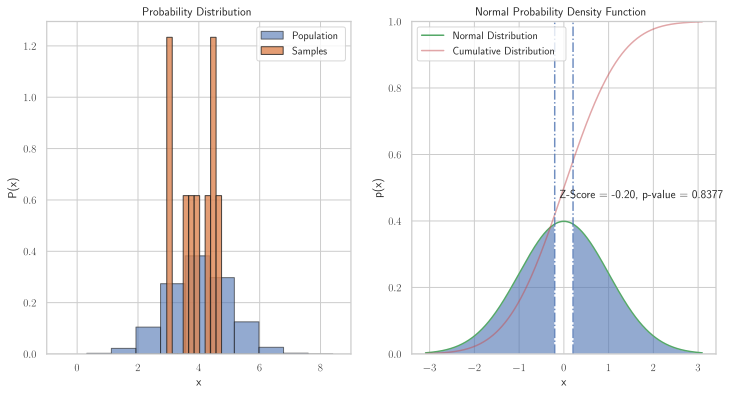

In [17]:
population_mean = 4.0
population_std = 1.0
population_size = 50000
population_dist = np.random.normal(population_mean, population_std, population_size)
population = Population(population_mean, population_std)

sample_size = 9
sample = np.random.normal(population_mean, population_std, sample_size)

display_center = population_mean
display_marginal = population_std * 5
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.hist(population_dist, edgecolor='k', alpha=0.6, label="Population", density=True)
ax1.hist(sample, edgecolor='k', alpha=0.8, label="Samples", density=True)
ax1.legend()
ax1.set_title("Probability Distribution")
ax1.set_xlabel('x')
ax1.set_ylabel("P(x)")
ax1.set_xlim(display_center - display_marginal, display_center + display_marginal)

samples = [sample]
populations = [population]

test_statistic = Test_Statistic()
test_statistic.sample_push(samples)
test_statistic.population_push(populations)

z_test = Hypothesis_Test(test_type="Z-Test")
z_test.xx_test(test_statistic, test_dict=example_test_dict, test_name="Test_1")
z_test.plot_hypothesis_test(ax2)

test_statistic.test_statistic_clear()

## Test 2

Carry out test Test_2...
p-value = 0.2628
Samples are likely drawn from the original distribution. FAIL TO REJECT H0
Statistically insiginificant...


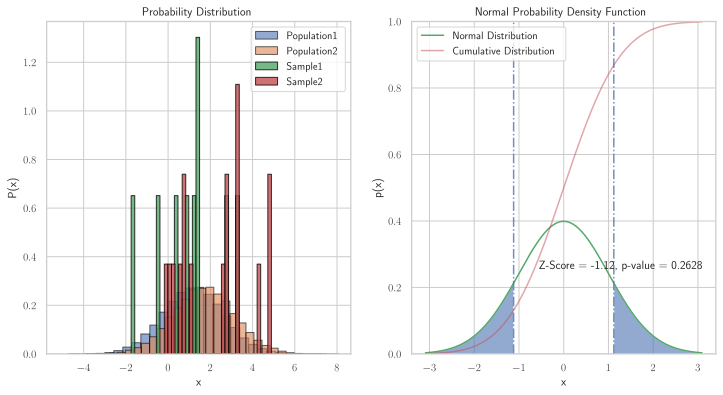

In [18]:
population1_mean = 1.2
population2_mean = 1.7
population_std = 1.4405
population_size = 30000
population1_dist = np.random.normal(population1_mean, population_std, population_size)
population2_dist = np.random.normal(population2_mean, population_std, population_size)
population1 = Population(population1_mean, population_std)
population2 = Population(population2_mean, population_std)

sample1_size = 9
sample2_size = 16
sample1 = np.random.normal(population1_mean, population_std, sample1_size)
sample2 = np.random.normal(population2_mean, population_std, sample2_size)

display_center = (population1_mean + population2_mean) / 2.0
display_marginal = population_std * 5
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax.hist(population1_dist, bins=30, edgecolor='black', alpha=0.6, label='Population1', density=True)
ax.hist(population2_dist, bins=30, edgecolor='black', alpha=0.6, label='Population2', density=True)
ax.hist(sample1, bins=30, edgecolor='black', alpha=0.8, label='Sample1', density=True)
ax.hist(sample2, bins=30, edgecolor='black', alpha=0.8, label='Sample2', density=True)
ax.legend()
ax.set_title("Probability Distribution")
ax.set_xlabel("x")
ax.set_ylabel("P(x)")
ax.set_xlim(display_center - display_marginal, display_center + display_marginal)

samples = [sample1, sample2]
populations = [population1, population2]

test_statistic = Test_Statistic()
test_statistic.sample_push(samples)
test_statistic.population_push(populations)

z_test = Hypothesis_Test(test_type="Z-Test")
z_test.xx_test(test_statistic, test_dict=example_test_dict, test_name="Test_2")
z_test.plot_hypothesis_test(ax2)

test_statistic.test_statistic_clear()

## Test 3

Carry out test Test_3...
p-value = 0.1708
Samples are likely drawn from the original distribution. FAIL TO REJECT H0
Statistically insiginificant...


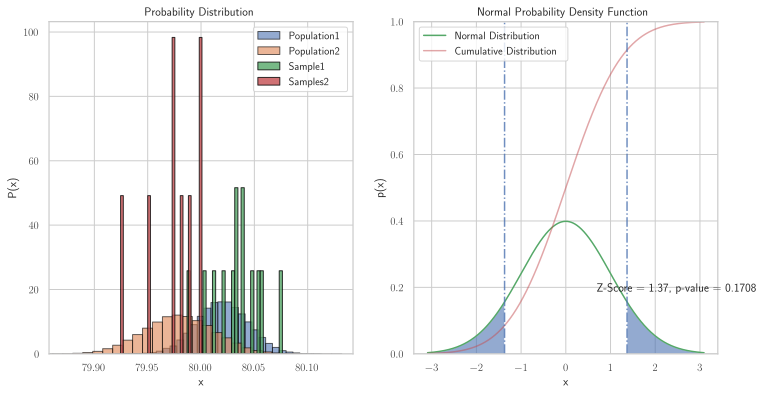

In [19]:
population1_mean = 80.02
population2_mean = 79.98
population1_std = np.sqrt(0.000576)
population2_std = np.sqrt(0.001089)
population_size = 30000
population1_dist = np.random.normal(population1_mean, population1_std, population_size)
population2_dist = np.random.normal(population2_mean, population2_std, population_size)
population1 = Population(population1_mean, population1_std)
population2 = Population(population2_mean, population2_std)

sample1_size = 13
sample2_size = 8
sample1 = np.random.normal(population1_mean, population1_std, sample1_size)
sample2 = np.random.normal(population2_mean, population2_std, sample2_size)

display_center = (population1_mean + population2_mean) / 2.0
display_marginal = (population1_std + population2_std) / 2.0  * 5
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax.hist(population1_dist, bins=30, edgecolor='black', alpha=0.6, label='Population1', density=True)
ax.hist(population2_dist, bins=30, edgecolor='black', alpha=0.6, label='Population2', density=True)
ax.hist(sample1, bins=30, edgecolor='black', alpha=0.8, label='Sample1', density=True)
ax.hist(sample2, bins=30, edgecolor='black', alpha=0.8, label='Samples2', density=True)
ax.legend()
ax.set_title("Probability Distribution")
ax.set_xlabel("x")
ax.set_ylabel("P(x)")
ax.set_xlim(display_center - display_marginal, display_center + display_marginal)

samples = [sample1, sample2]
populations = [population1, population2]

test_statistic = Test_Statistic()
test_statistic.sample_push(samples)
test_statistic.population_push(populations)

z_test = Hypothesis_Test(test_type="Z-Test")
z_test.xx_test(test_statistic, test_dict=example_test_dict, test_name="Test_3")
z_test.plot_hypothesis_test(ax2)

test_statistic.test_statistic_clear()

## Test 4

Carry out test Test_4...
p-value = 0.7642
Samples are likely drawn from the original distribution. FAIL TO REJECT H0
Statistically insiginificant...


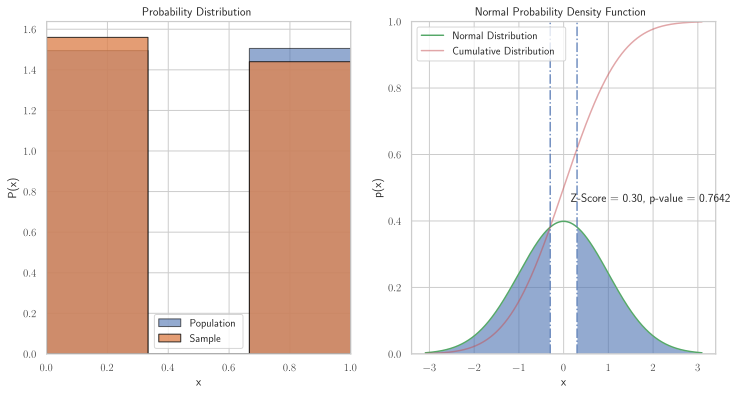

In [20]:
population_prob = 0.5
population_size = 30000
trails = 1
population_dist = np.random.binomial(trails, population_prob, population_size)
population = Population(population_prob, None, dist_type="Binomial")

sample_size = 100
sample_mean = 0.4
sample = np.random.binomial(trails, sample_mean, sample_size)

display_center = (population1_mean + population2_mean) / 2.0
display_marginal = (population1_std + population2_std) / 2.0  * 5
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax.hist(population_dist, bins=3, edgecolor='black', alpha=0.6, label='Population', density=True)
ax.hist(sample, bins=3, edgecolor='black', alpha=0.8, label='Sample', density=True)
ax.legend()
ax.set_title("Probability Distribution")
ax.set_xlabel("x")
ax.set_ylabel("P(x)")
ax.set_xlim(0, trails)

samples = [sample]
populations = [population]

test_statistic = Test_Statistic()
test_statistic.sample_push(samples)
test_statistic.population_push(populations)

z_test = Hypothesis_Test(test_type="Z-Test")
z_test.xx_test(test_statistic, test_dict=example_test_dict, test_name="Test_4")
z_test.plot_hypothesis_test(ax2)

test_statistic.test_statistic_clear()

## Test 5

Carry out test Test_5...
p-value = 0.0000
Samples are likely drawn from a different distribution. REJECT H0
Statistical siginificance: p*** (p < 0.001)


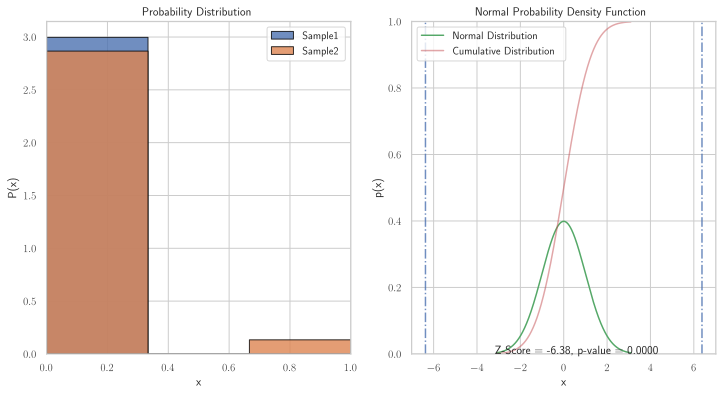

In [21]:
trails = 1
sample1_size = 952
sample2_size = 1168
sample1_prob = 0.00325
sample2_prob = 0.0573
sample1 = np.random.binomial(trails, sample1_prob, sample1_size)
sample2 = np.random.binomial(trails, sample2_prob, sample2_size)
population = Population(None, None, dist_type="Binomial")

display_center = (sample1.mean() + sample2.mean()) / 2.0
display_marginal = (sample1.std() + sample2.std()) / 2.0  * 5
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax.hist(sample1, bins=3, edgecolor='black', alpha=0.8, label='Sample1', density=True)
ax.hist(sample2, bins=3, edgecolor='black', alpha=0.8, label='Sample2', density=True)
ax.legend()
ax.set_title("Probability Distribution")
ax.set_xlabel("x")
ax.set_ylabel("P(x)")
ax.set_xlim(0, trails)

samples = [sample1, sample2]
populations = [population]

test_statistic = Test_Statistic()
test_statistic.sample_push(samples)
test_statistic.population_push(populations)

z_test = Hypothesis_Test(test_type="Z-Test")
z_test.xx_test(test_statistic, test_dict=example_test_dict, test_name="Test_5")
z_test.plot_hypothesis_test(ax2)

test_statistic.test_statistic_clear()

## Test 6

Carry out test Test_6...
p-value = 0.0318
Samples are likely drawn from a different distribution. REJECT H0
Statistical siginificance: p* (p < 0.05)


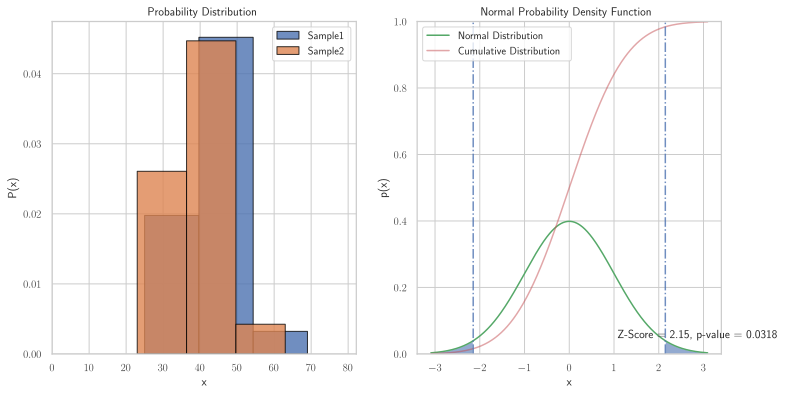

In [22]:
sample1_size = 952
sample2_size = 1168
t1 = 22
t2 = 30
sample1_mean = sample1_size / t1
sample2_mean = sample2_size / t2
sample1 = np.random.poisson(sample1_mean, sample1_size)
sample2 = np.random.poisson(sample2_mean, sample2_size)
population = Population(None, None, dist_type="Poisson")

display_center = (sample1_mean + sample2_mean) / 2.0
display_marginal = (sample1.std() + sample2.std()) / 2.0  * 5
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax.hist(sample1, bins=3, edgecolor='black', alpha=0.8, label='Sample1', density=True)
ax.hist(sample2, bins=3, edgecolor='black', alpha=0.8, label='Sample2', density=True)
ax.legend()
ax.set_title("Probability Distribution")
ax.set_xlabel("x")
ax.set_ylabel("P(x)")
ax.set_xlim(0, display_center * 2)

samples = [sample1, sample2]
t_list = [t1, t2]
populations = [population]

test_statistic = Test_Statistic()
test_statistic.sample_push(samples)
test_statistic.time_value_push(t_list)
test_statistic.population_push(populations)

z_test = Hypothesis_Test(test_type="Z-Test")
z_test.xx_test(test_statistic, test_dict=example_test_dict, test_name="Test_6")
z_test.plot_hypothesis_test(ax2)

test_statistic.test_statistic_clear()

## Test 7

Carry out test Test_7...
p-value = 0.0000
Samples are likely drawn from a different distribution. REJECT H0
Statistical siginificance: p*** (p < 0.001)


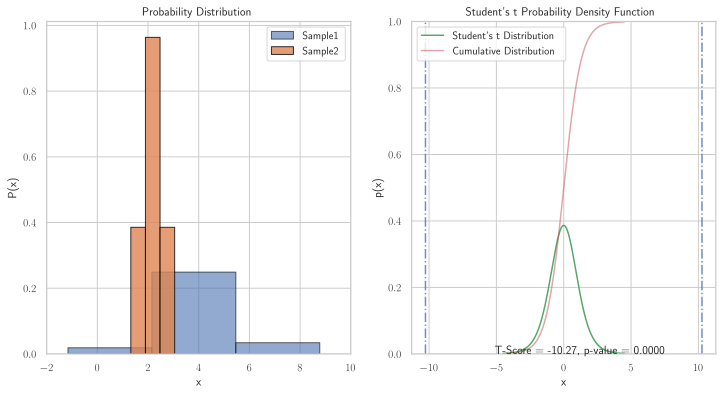

In [23]:
population_mean = 4.0
population_std = 1.2
population_size = 30000
population_dist = np.random.normal(population_mean, population_std, population_size)
population = Population(population_mean, population_std)

sample_size = 9
sample_mean = 3.1
sample_std = 1.0
sample = np.random.normal(sample_mean, sample_std, sample_size)

display_center = population_mean
display_marginal = population_std
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax.hist(population_dist, bins=3, edgecolor='black', alpha=0.6, label='Sample1', density=True)
ax.hist(sample, bins=3, edgecolor='black', alpha=0.8, label='Sample2', density=True)
ax.legend()
ax.set_title("Probability Distribution")
ax.set_xlabel("x")
ax.set_ylabel("P(x)")
ax.set_xlim(display_center - 5 * display_marginal, display_center + 5 * display_marginal)

samples = [sample]
populations = [population]

test_statistic = Test_Statistic()
test_statistic.sample_push(samples)
test_statistic.population_push(populations)

t_test = Hypothesis_Test(test_type="T-Test", dof=(sample_size - 1))
t_test.xx_test(test_statistic, test_dict=example_test_dict, test_name="Test_7")
t_test.plot_hypothesis_test(ax2)

test_statistic.test_statistic_clear()

## Test 8

Carry out test Test_8...
p-value = 0.6481
Samples are likely drawn from the original distribution. FAIL TO REJECT H0
Statistically insiginificant...


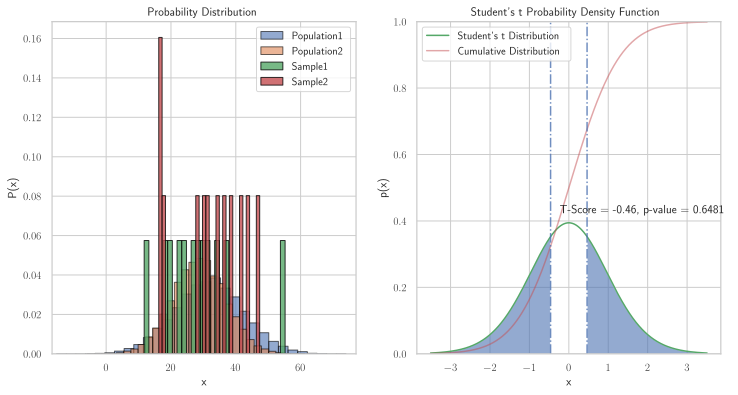

In [24]:
population1_mean = 31.75
population2_mean = 28.67
population1_std = np.sqrt(112.25)
population2_std = np.sqrt(66.64)
population_size = 30000
population1_dist = np.random.normal(population1_mean, population1_std, population_size)
population2_dist = np.random.normal(population2_mean, population2_std, population_size)
population1 = Population(population1_mean, population_std)
population2 = Population(population2_mean, population_std)

sample1_size = 12
sample2_size = 12
sample1 = np.random.normal(population1_mean, population1_std, sample1_size)
sample2 = np.random.normal(population2_mean, population2_std, sample2_size)

display_center = (population1_mean + population2_mean) / 2.0
display_marginal = (population1_std + population2_std) / 2.0
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax.hist(population1_dist, bins=30, edgecolor='black', alpha=0.6, label='Population1', density=True)
ax.hist(population2_dist, bins=30, edgecolor='black', alpha=0.6, label='Population2', density=True)
ax.hist(sample1, bins=30, edgecolor='black', alpha=0.8, label='Sample1', density=True)
ax.hist(sample2, bins=30, edgecolor='black', alpha=0.8, label='Sample2', density=True)
ax.legend()
ax.set_title("Probability Distribution")
ax.set_xlabel("x")
ax.set_ylabel("P(x)")
ax.set_xlim(display_center - 5 * display_marginal, display_center + 5 * display_marginal)

samples = [sample1, sample2]
populations = [population1, population2]

test_statistic = Test_Statistic()
test_statistic.sample_push(samples)
test_statistic.population_push(populations)

t_test = Hypothesis_Test(test_type="T-Test", dof=(sample1_size + sample2_size - 2))
t_test.xx_test(test_statistic, test_dict=example_test_dict, test_name="Test_8")
t_test.plot_hypothesis_test(ax2)

test_statistic.test_statistic_clear()

## Test 9

Carry out test Test_9...
p-value = 0.9605
Samples are likely drawn from the original distribution. FAIL TO REJECT H0
Statistically insiginificant...


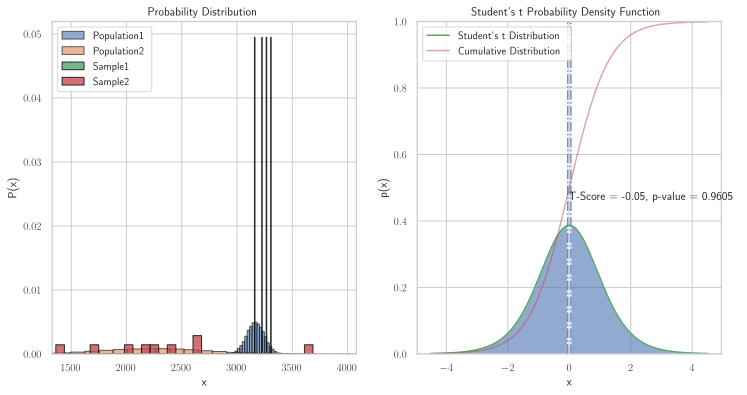

In [25]:
population1_mean = 3166.0
population2_mean = 2240.4
population1_std = np.sqrt(6328.67)
population2_std = np.sqrt(221661.3)
population_size = 30000
population1_dist = np.random.normal(population1_mean, population1_std, population_size)
population2_dist = np.random.normal(population2_mean, population2_std, population_size)
population1 = Population(population1_mean, population1_std)
population2 = Population(population2_mean, population2_std)

sample1_size = 4
sample2_size = 9
sample1 = np.random.normal(population1_mean, population1_std, sample1_size)
sample2 = np.random.normal(population2_mean, population2_std, sample2_size)

display_center = (population1_mean + population2_mean) / 2.0
display_marginal = (population1_std + population2_std) / 2.0
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax.hist(population1_dist, bins=30, edgecolor='black', alpha=0.6, label='Population1', density=True)
ax.hist(population2_dist, bins=30, edgecolor='black', alpha=0.6, label='Population2', density=True)
ax.hist(sample1, bins=30, edgecolor='black', alpha=0.8, label='Sample1', density=True)
ax.hist(sample2, bins=30, edgecolor='black', alpha=0.8, label='Sample2', density=True)
ax.legend()
ax.set_title("Probability Distribution")
ax.set_xlabel("x")
ax.set_ylabel("P(x)")
ax.set_xlim(display_center - 5 * display_marginal, display_center + 5 * display_marginal)

samples = [sample1, sample2]
populations = [population1, population2]

test_statistic = Test_Statistic()
test_statistic.sample_push(samples)
test_statistic.population_push(populations)

dof = test_statistic.calculate_dof()
t_test = Hypothesis_Test(test_type="T-Test", dof=dof)
t_test.xx_test(test_statistic, test_dict=example_test_dict, test_name="Test_9")
t_test.plot_hypothesis_test(ax2)

test_statistic.test_statistic_clear()

## Test 10

Carry out test Test_10...
p-value = 0.5682
Samples are likely drawn from the original distribution. FAIL TO REJECT H0
Statistically insiginificant...


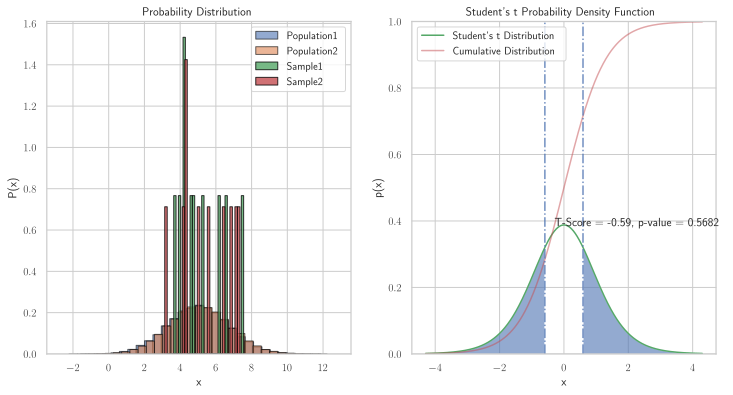

In [26]:
population1_mean = 5
population2_mean = 5.1
population1_std = np.sqrt(2.9)
population2_std = np.sqrt(2.9)
population_size = 30000
population1_dist = np.random.normal(population1_mean, population1_std, population_size)
population2_dist = np.random.normal(population2_mean, population2_std, population_size)
population1 = Population(population1_mean, population1_std)
population2 = Population(population2_mean, population2_std)

sample_size = 10
sample1 = np.random.normal(population1_mean, population1_std, sample_size)
sample2 = np.random.normal(population2_mean, population2_std, sample_size)

display_center = (population1_mean + population2_mean) / 2.0
display_marginal = (population1_std + population2_std) / 2.0
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax.hist(population1_dist, bins=30, edgecolor='black', alpha=0.6, label='Population1', density=True)
ax.hist(population2_dist, bins=30, edgecolor='black', alpha=0.6, label='Population2', density=True)
ax.hist(sample1, bins=30, edgecolor='black', alpha=0.8, label='Sample1', density=True)
ax.hist(sample2, bins=30, edgecolor='black', alpha=0.8, label='Sample2', density=True)
ax.legend()
ax.set_title("Probability Distribution")
ax.set_xlabel("x")
ax.set_ylabel("P(x)")
ax.set_xlim(display_center - 5 * display_marginal, display_center + 5 * display_marginal)

samples = [sample1, sample2]
populations = [population1, population2]

test_statistic = Test_Statistic()
test_statistic.sample_push(samples)
test_statistic.population_push(populations)

t_test = Hypothesis_Test(test_type="T-Test", dof=(sample_size - 1))
t_test.xx_test(test_statistic, test_dict=example_test_dict, test_name="Test_10")
t_test.plot_hypothesis_test(ax2)

test_statistic.test_statistic_clear()

## Test 11

Carry out test Test_11...
p-value = 0.6026
Samples are likely drawn from the original distribution. FAIL TO REJECT H0
Statistically insiginificant...


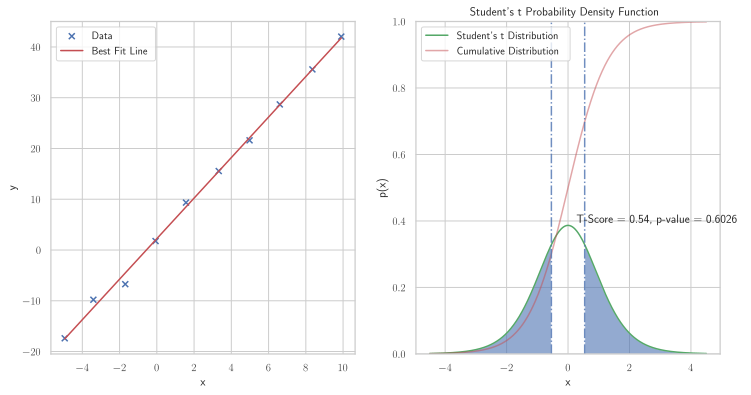

In [27]:
n = 10
x = np.linspace(-5, 10, n)
m, c = 4, 2
f = lambda x, m, c: m * x + c
y = f(x, m, c)
x_data = x + np.random.normal(0, 0.1, n)
y_data = y + np.random.normal(0, 1.2, n)

m_fit, c_fit = np.polyfit(x_data, y_data, 1)
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax.scatter(x_data, y_data, marker='x', label="Data")
ax.plot(x_data, f(x_data, m_fit, c_fit), color='r', label="Best Fit Line")
ax.legend()
ax.set_xlabel("x")
ax.set_ylabel("y")

samples = [x_data, y_data]
populations = []

test_statistic = Test_Statistic()
test_statistic.sample_push(samples)
test_statistic.population_push(populations)

t_test = Hypothesis_Test(test_type="T-Test", dof=(x_data.size - 2))
t_test.xx_test(test_statistic, test_dict=example_test_dict, test_name="Test_11")
t_test.plot_hypothesis_test(ax2)

test_statistic.test_statistic_clear()

## Test 12

Carry out test Test_12...
p-value = 0.1989
Samples are likely drawn from the original distribution. FAIL TO REJECT H0
Statistically insiginificant...


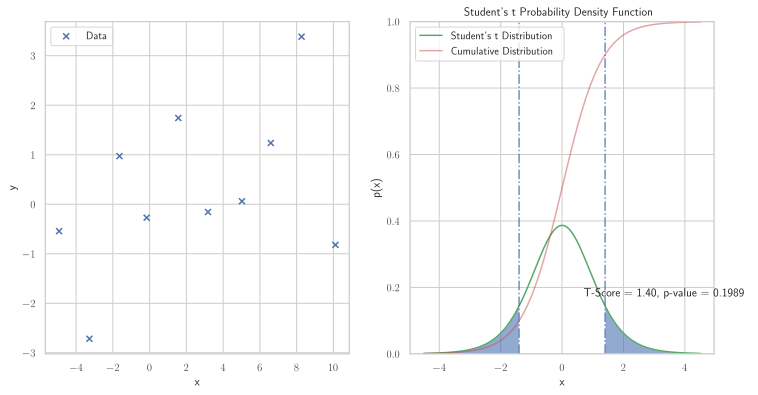

In [28]:
n = 10
x = np.linspace(-5, 10, n)
m, c = 4, 2
f = lambda x, m, c: m * x + c
x_data = x + np.random.normal(0, 0.1, n)
# y_data = f(x, m, c) + np.random.normal(0, 1.2, n)
y_data = np.random.normal(0, 1.2, n)

fig, (ax, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax.scatter(x_data, y_data, marker='x', label="Data")
ax.legend()
ax.set_xlabel("x")
ax.set_ylabel("y")

samples = [x_data, y_data]
populations = []

test_statistic = Test_Statistic()
test_statistic.sample_push(samples)
test_statistic.population_push(populations)

t_test = Hypothesis_Test(test_type="T-Test", dof=(x_data.size - 2))
t_test.xx_test(test_statistic, test_dict=example_test_dict, test_name="Test_12")
t_test.plot_hypothesis_test(ax2)

test_statistic.test_statistic_clear()

## Test 13

Carry out test Test_13...
p-value = 0.0581
Samples are likely drawn from the original distribution. FAIL TO REJECT H0
Statistically insiginificant...


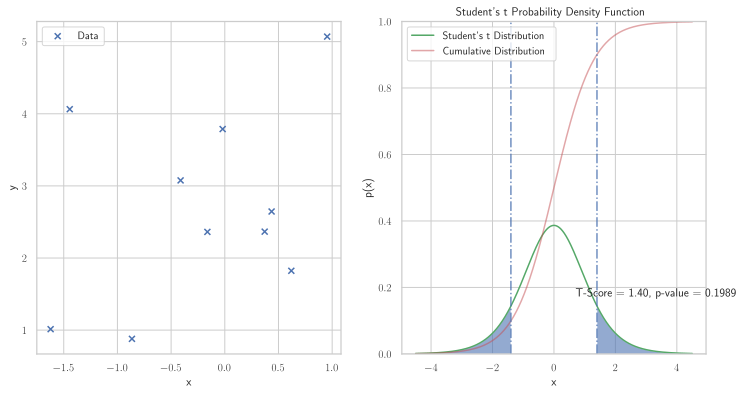

In [29]:
x_data = np.random.normal(0, 1.1, n)
y_data = np.random.normal(3, 1.3, n)

fig, (ax, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax.scatter(x_data, y_data, marker='x', label="Data")
ax.legend()
ax.set_xlabel("x")
ax.set_ylabel("y")

samples = [x_data, y_data]
populations = []

test_statistic = Test_Statistic()
test_statistic.sample_push(samples)
test_statistic.population_push(populations)
test_statistic.rho_for_correlation(rho=0.8)

z_test = Hypothesis_Test(test_type="Z-Test")
z_test.xx_test(test_statistic, test_dict=example_test_dict, test_name="Test_13")
t_test.plot_hypothesis_test(ax2)

test_statistic.test_statistic_clear()